# I360 - Data Science - Project 

In [1]:
import pandas as pd
import category_encoders as ce
pd.options.display.max_rows = 4000
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
user_response = pd.read_csv("File1.csv") 
user_data = pd.read_csv("File2.csv") 

In [3]:
data = pd.merge(user_data, user_response, how='inner', on=['ID','State'])


In [4]:
print("Input data shape : ",data.shape)

Input data shape :  (20000, 150)


# Exploratory Data Analysis 

### Analysis about Dependent variable 

Reduce National Debt and Deficit    13831
Spend to Improve Economy             6169
Name: SPENDINGRESPONSE, dtype: int64


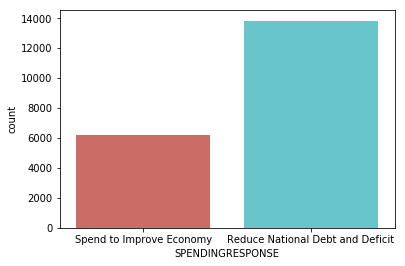

In [5]:
print(data['SPENDINGRESPONSE'].value_counts())

sns.countplot(x='SPENDINGRESPONSE', data=data, palette='hls')
plt.show()

In [6]:
improve_econ = len(data[data['SPENDINGRESPONSE']=='Spend to Improve Economy'])
reduce_debt = len(data[data['SPENDINGRESPONSE']=='Reduce National Debt and Deficit'])
improve_econ_vot = improve_econ/(improve_econ+reduce_debt)
print("percentage of Improve Economy vote ", improve_econ_vot*100)
reduce_debt_vote = reduce_debt/(improve_econ+reduce_debt)
print("percentage of Reduce National Debt vote ", reduce_debt_vote*100)

percentage of Improve Economy vote  30.845
percentage of Reduce National Debt vote  69.155


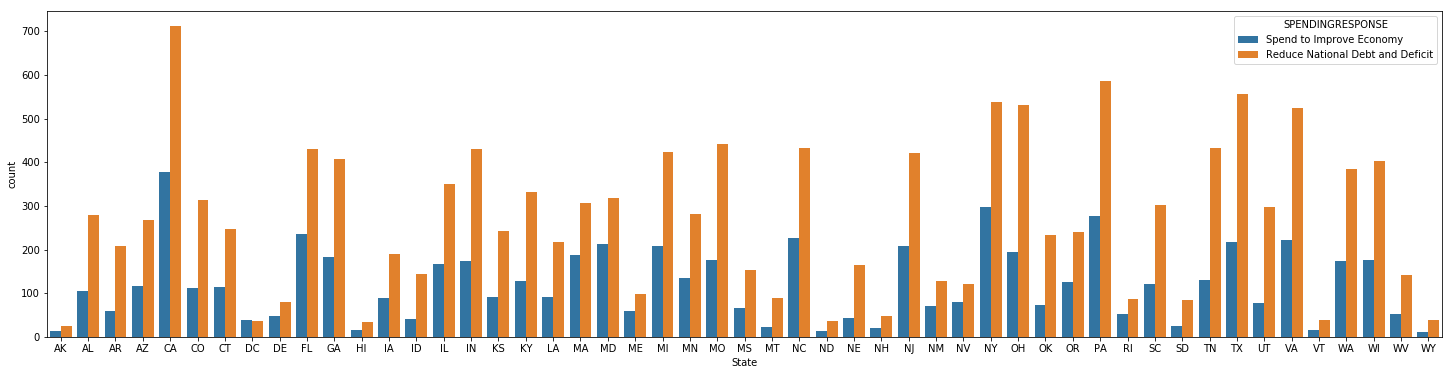

In [7]:
plt.rcParams['figure.figsize'] = (25, 6)
sns.countplot(x='State', hue='SPENDINGRESPONSE', data=data);

### Analysis about  Independent Variable - Categorial Data 

In [8]:
## Get all the categorial variable 

cols = data.columns
num_cols = data._get_numeric_data().columns
categorical_columns= list(set(cols) - set(num_cols))


# Let's also check the column-wise distribution of null values:

categorical_nullcount= pd.DataFrame(data[categorical_columns].isnull().sum())
categorical_nullcount.columns = ['Null_Count']
summary_categorical = data.describe(include=['object', 'bool'])
summary_categorical = pd.DataFrame(summary_categorical.astype(object).T)
summary_categorical = summary_categorical[['count','unique']]


summary_categorical= pd.merge(summary_categorical, categorical_nullcount, left_index=True, right_index=True)

print("Total Number of categorical variable : ", len(categorical_columns))
print('\n\n\n Summary of the catergorical variable \n\n', summary_categorical)

Total Number of categorical variable :  25



 Summary of the catergorical variable 

                   count unique  Null_Count
State             20000     51           0
f1                20000    437           0
f3                19977     17          23
f12               17468      5        2532
f13               20000      2           0
f95               20000      6           0
f96               20000      4           0
f97               20000     10           0
f98               20000      4           0
f99               20000     10           0
f100              20000      4           0
f101              20000     10           0
f102              20000      4           0
f103              20000     10           0
f108              17795     15        2205
f110              17795     30        2205
f114              17795     20        2205
f115              13661     72        6339
f118              17795     10        2205
f119               6345     11       13655
f120      

### Analysis about  Independent Variable - Contineous Data 

In [9]:
numeric_nullcount= pd.DataFrame(data[num_cols].isnull().sum())
numeric_nullcount.columns = ['Null_Count']
summary_numeric = data.describe()
summary_numeric= summary_numeric.astype(object).T
summary_numeric= pd.merge(summary_numeric, numeric_nullcount, left_index=True, right_index=True)


print("Total Number of Numeric variable : ", len(num_cols))
# print('\n\n\n Summary of the Numeric variable \n\n', summary_numeric)

Total Number of Numeric variable :  125


In [10]:
summary_numeric

,count,mean,std,min,25%,50%,75%,max,Null_Count
ID,20000,7.14522e+08,1.04773e+09,18138,1.37119e+08,3.38787e+08,7.42582e+08,6.19592e+09,0
f2,20000,49.9699,17.8222,18,35,51,63,104,0
f4,19925,52.4456,25.4684,5.16667,29.0833,56.5,73.6,95.8333,75
f5,19925,52.4124,25.3765,6.5,26.9167,57.25,74.25,94.1667,75
f6,19925,52.0825,25.1906,3.75,28.9167,57.9167,73.9167,94,75
f7,19925,48.5518,24.6497,10.0417,23.75,47.0417,67.75,90.875,75
f8,19925,48.3565,23.5761,15.5,25.5417,48.0833,69.9091,89.6667,75
f9,19925,48.4781,22.5402,18,28.4167,48.7083,69.75,90.7917,75
f10,17537,0.475407,0.19421,0.001,0.361,0.49,0.614,1.543,2463
f11,18815,0.481241,0.210089,0,0.349,0.507,0.635,1,1185


# Handling N/A Values

### Handling N/A Value - Independent variable - Categorical Data


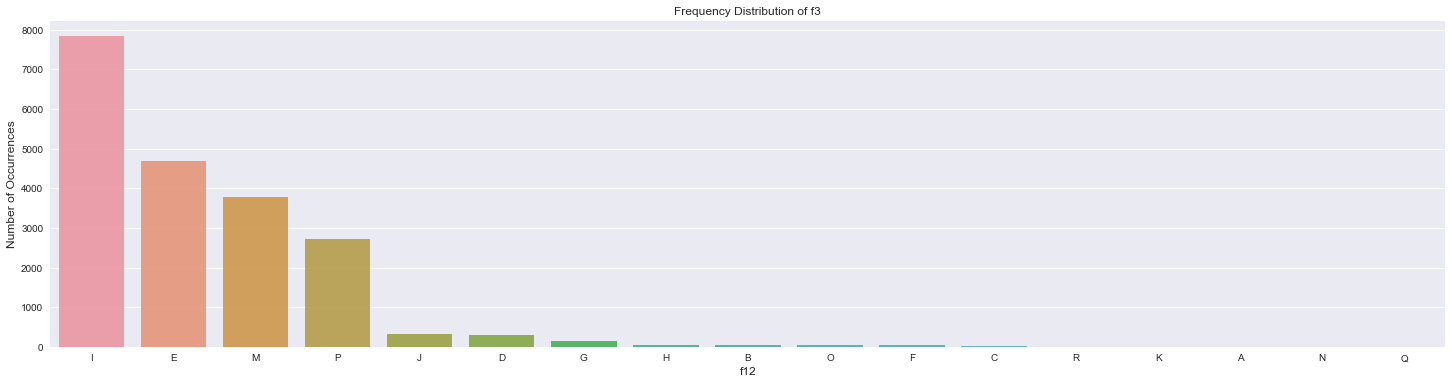

In [11]:

carrier_count = data['f3'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of f3')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('f12', fontsize=12)
plt.show()

In [12]:
# Replacing the f3 with the category occurs at the maximum in the set
data['f3'].fillna("I", inplace=True)

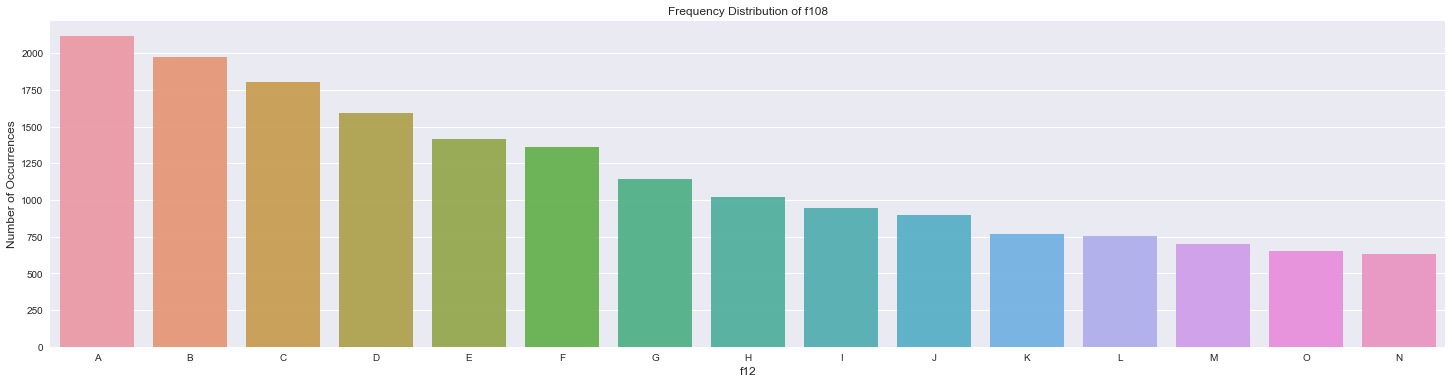

In [13]:

carrier_count = data['f108'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of f108')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('f12', fontsize=12)
plt.show()

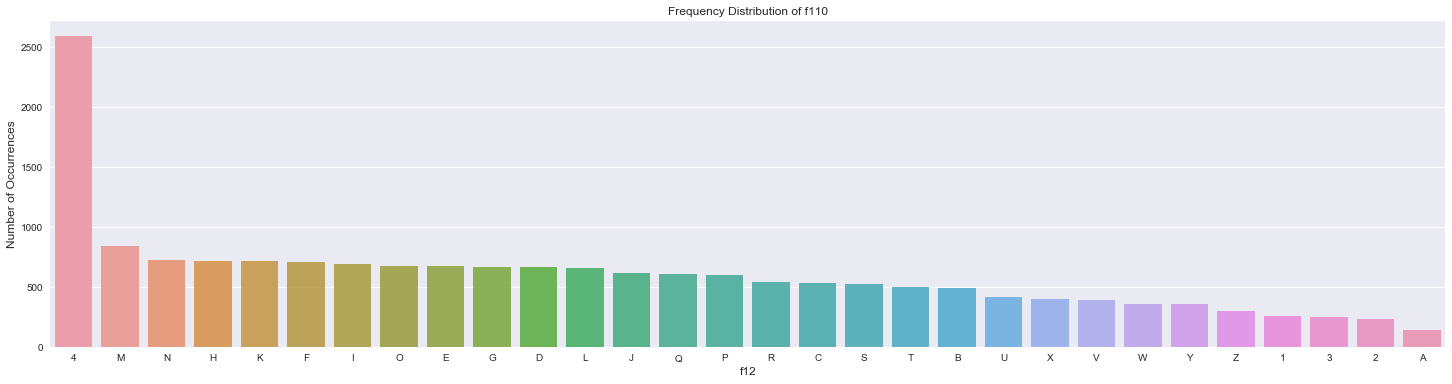

In [14]:

carrier_count = data['f110'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of f110')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('f12', fontsize=12)
plt.show()

We need to as this quesion before imputing the missing value. why are those values missing?
Data is rarely MAR (missing at random), so the fact that it is missing, has a meaning of its own.

Since our knowlege is limited about the data , and the source from which the data is gathered. we are going to keep the missing data a new seperate category 

In [15]:
data['f110'].fillna('MAR', inplace=True)
data['f108'].fillna('MAR', inplace=True)
data['f114'].fillna('MAR', inplace=True)
data['f118'].fillna('MAR', inplace=True)

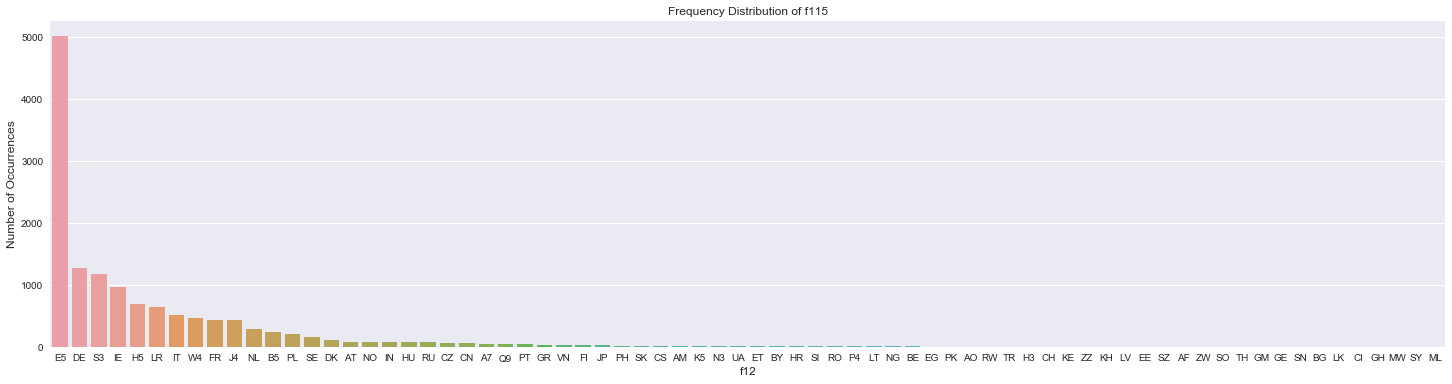

In [16]:
plt.rcParams['figure.figsize'] = (25, 6)
carrier_count = data['f115'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of f115')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('f12', fontsize=12)
plt.show()

In [17]:
data.loc[data['f12'].notnull(), 'f12'] = 1
data['f12'].fillna(0, inplace=True)

data.loc[data['f115'].notnull(), 'f115'] = 1
data['f115'].fillna(0, inplace=True)


data.loc[data['f119'].notnull(), 'f119'] = 1
data['f119'].fillna(0, inplace=True)

data.loc[data['f120'].notnull(), 'f120'] = 1
data['f120'].fillna(0, inplace=True)

data.loc[data['f121'].notnull(), 'f121'] = 1
data['f121'].fillna(0, inplace=True)

data.loc[data['f122'].notnull(), 'f122'] = 1
data['f122'].fillna(0, inplace=True)

data.loc[data['f126'].notnull(), 'f126'] = 1
data['f126'].fillna(0, inplace=True)

###  Dependent variable - Categorical Data 

In [18]:
d = {'Spend to Improve Economy' : 0, 'Reduce National Debt and Deficit' : 1} 
data['SPENDINGRESPONSE'] = data['SPENDINGRESPONSE'].map(d) 

### Handeling N/A Value - Indepedent variable - Contineous Data 

#### Checking for Outlier - Boxplot

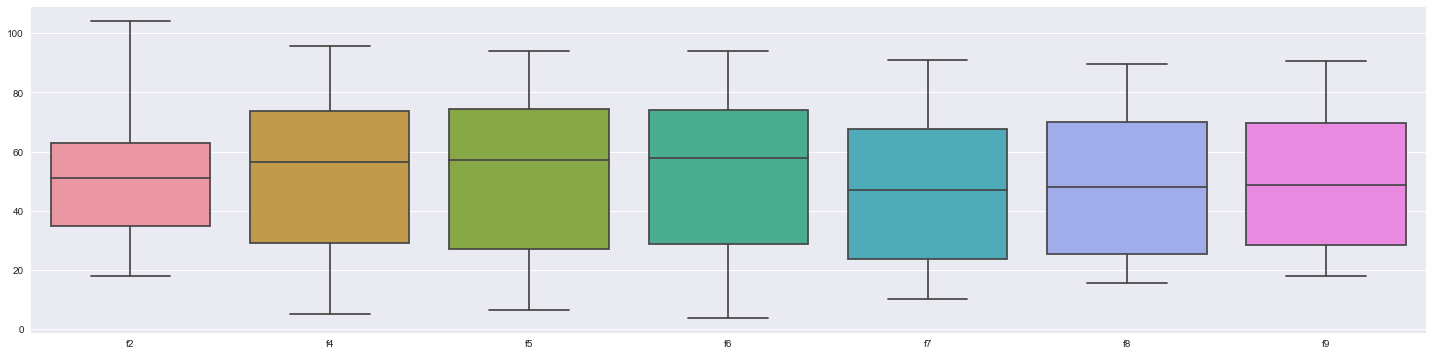

In [19]:
sns.boxplot(data= data.iloc[:,1:11])

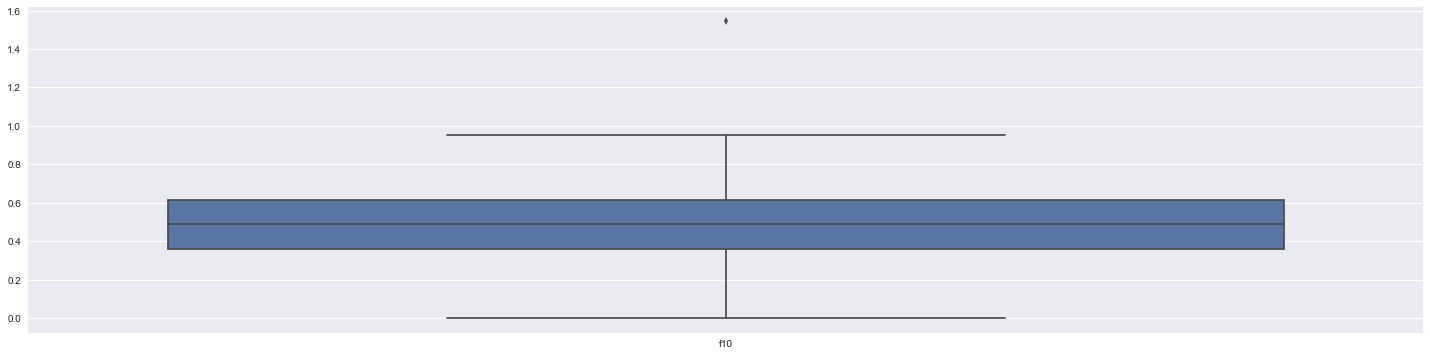

In [20]:
sns.boxplot(data= data[['f10',]])

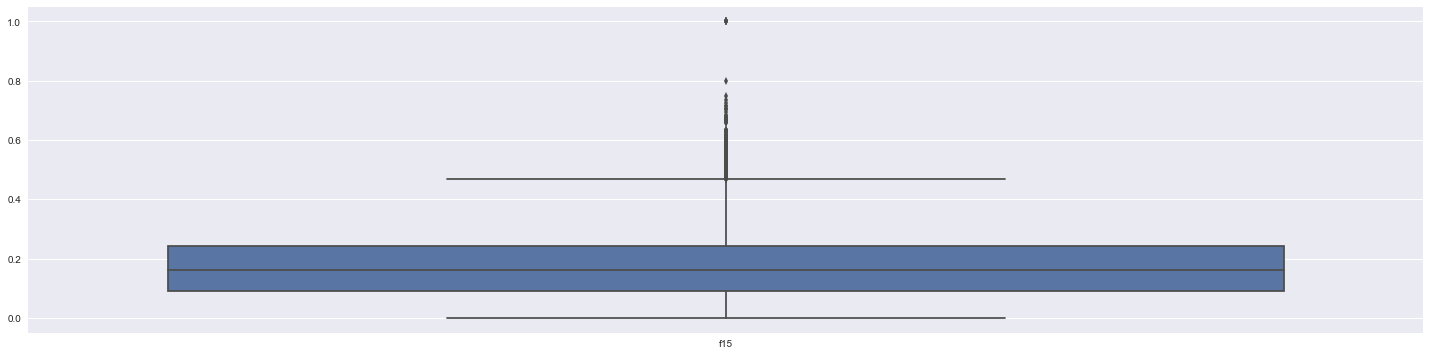

In [21]:
sns.boxplot(data= data[['f15',]])

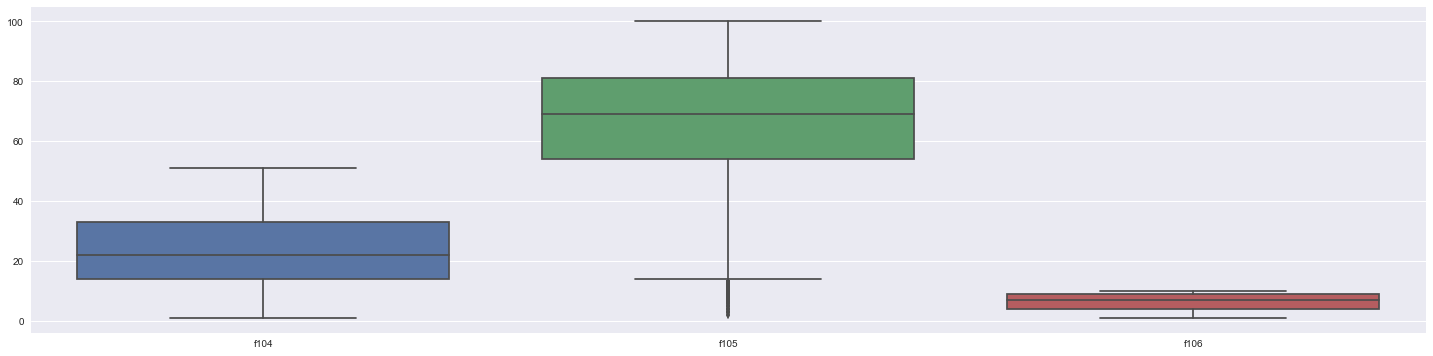

In [22]:
sns.boxplot(data= data[['f104','f105','f106']])

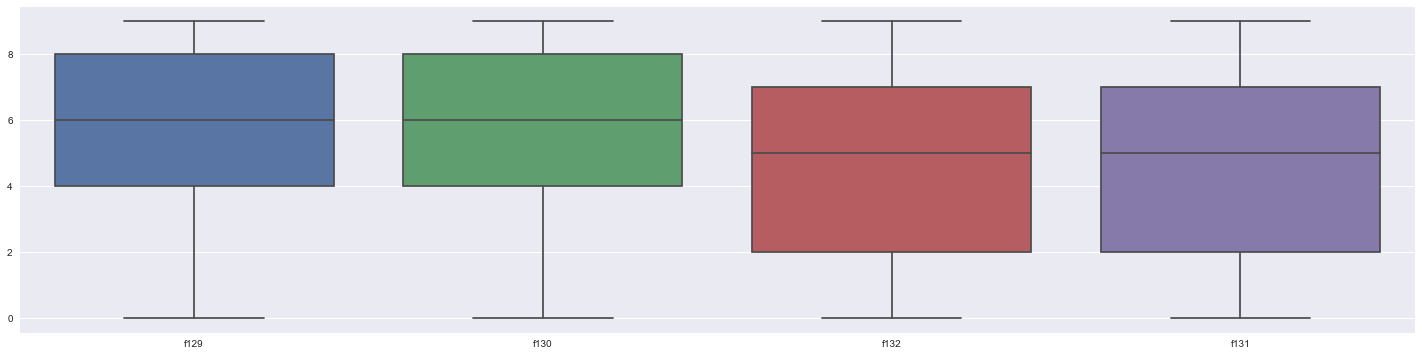

In [23]:
sns.boxplot(data= data[['f129','f130','f132','f131']])

#### Cheking the distribution of all the Independent  variable - Contineous Data 

C:\Users\babus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017342720EB8>,
      dtype=object)

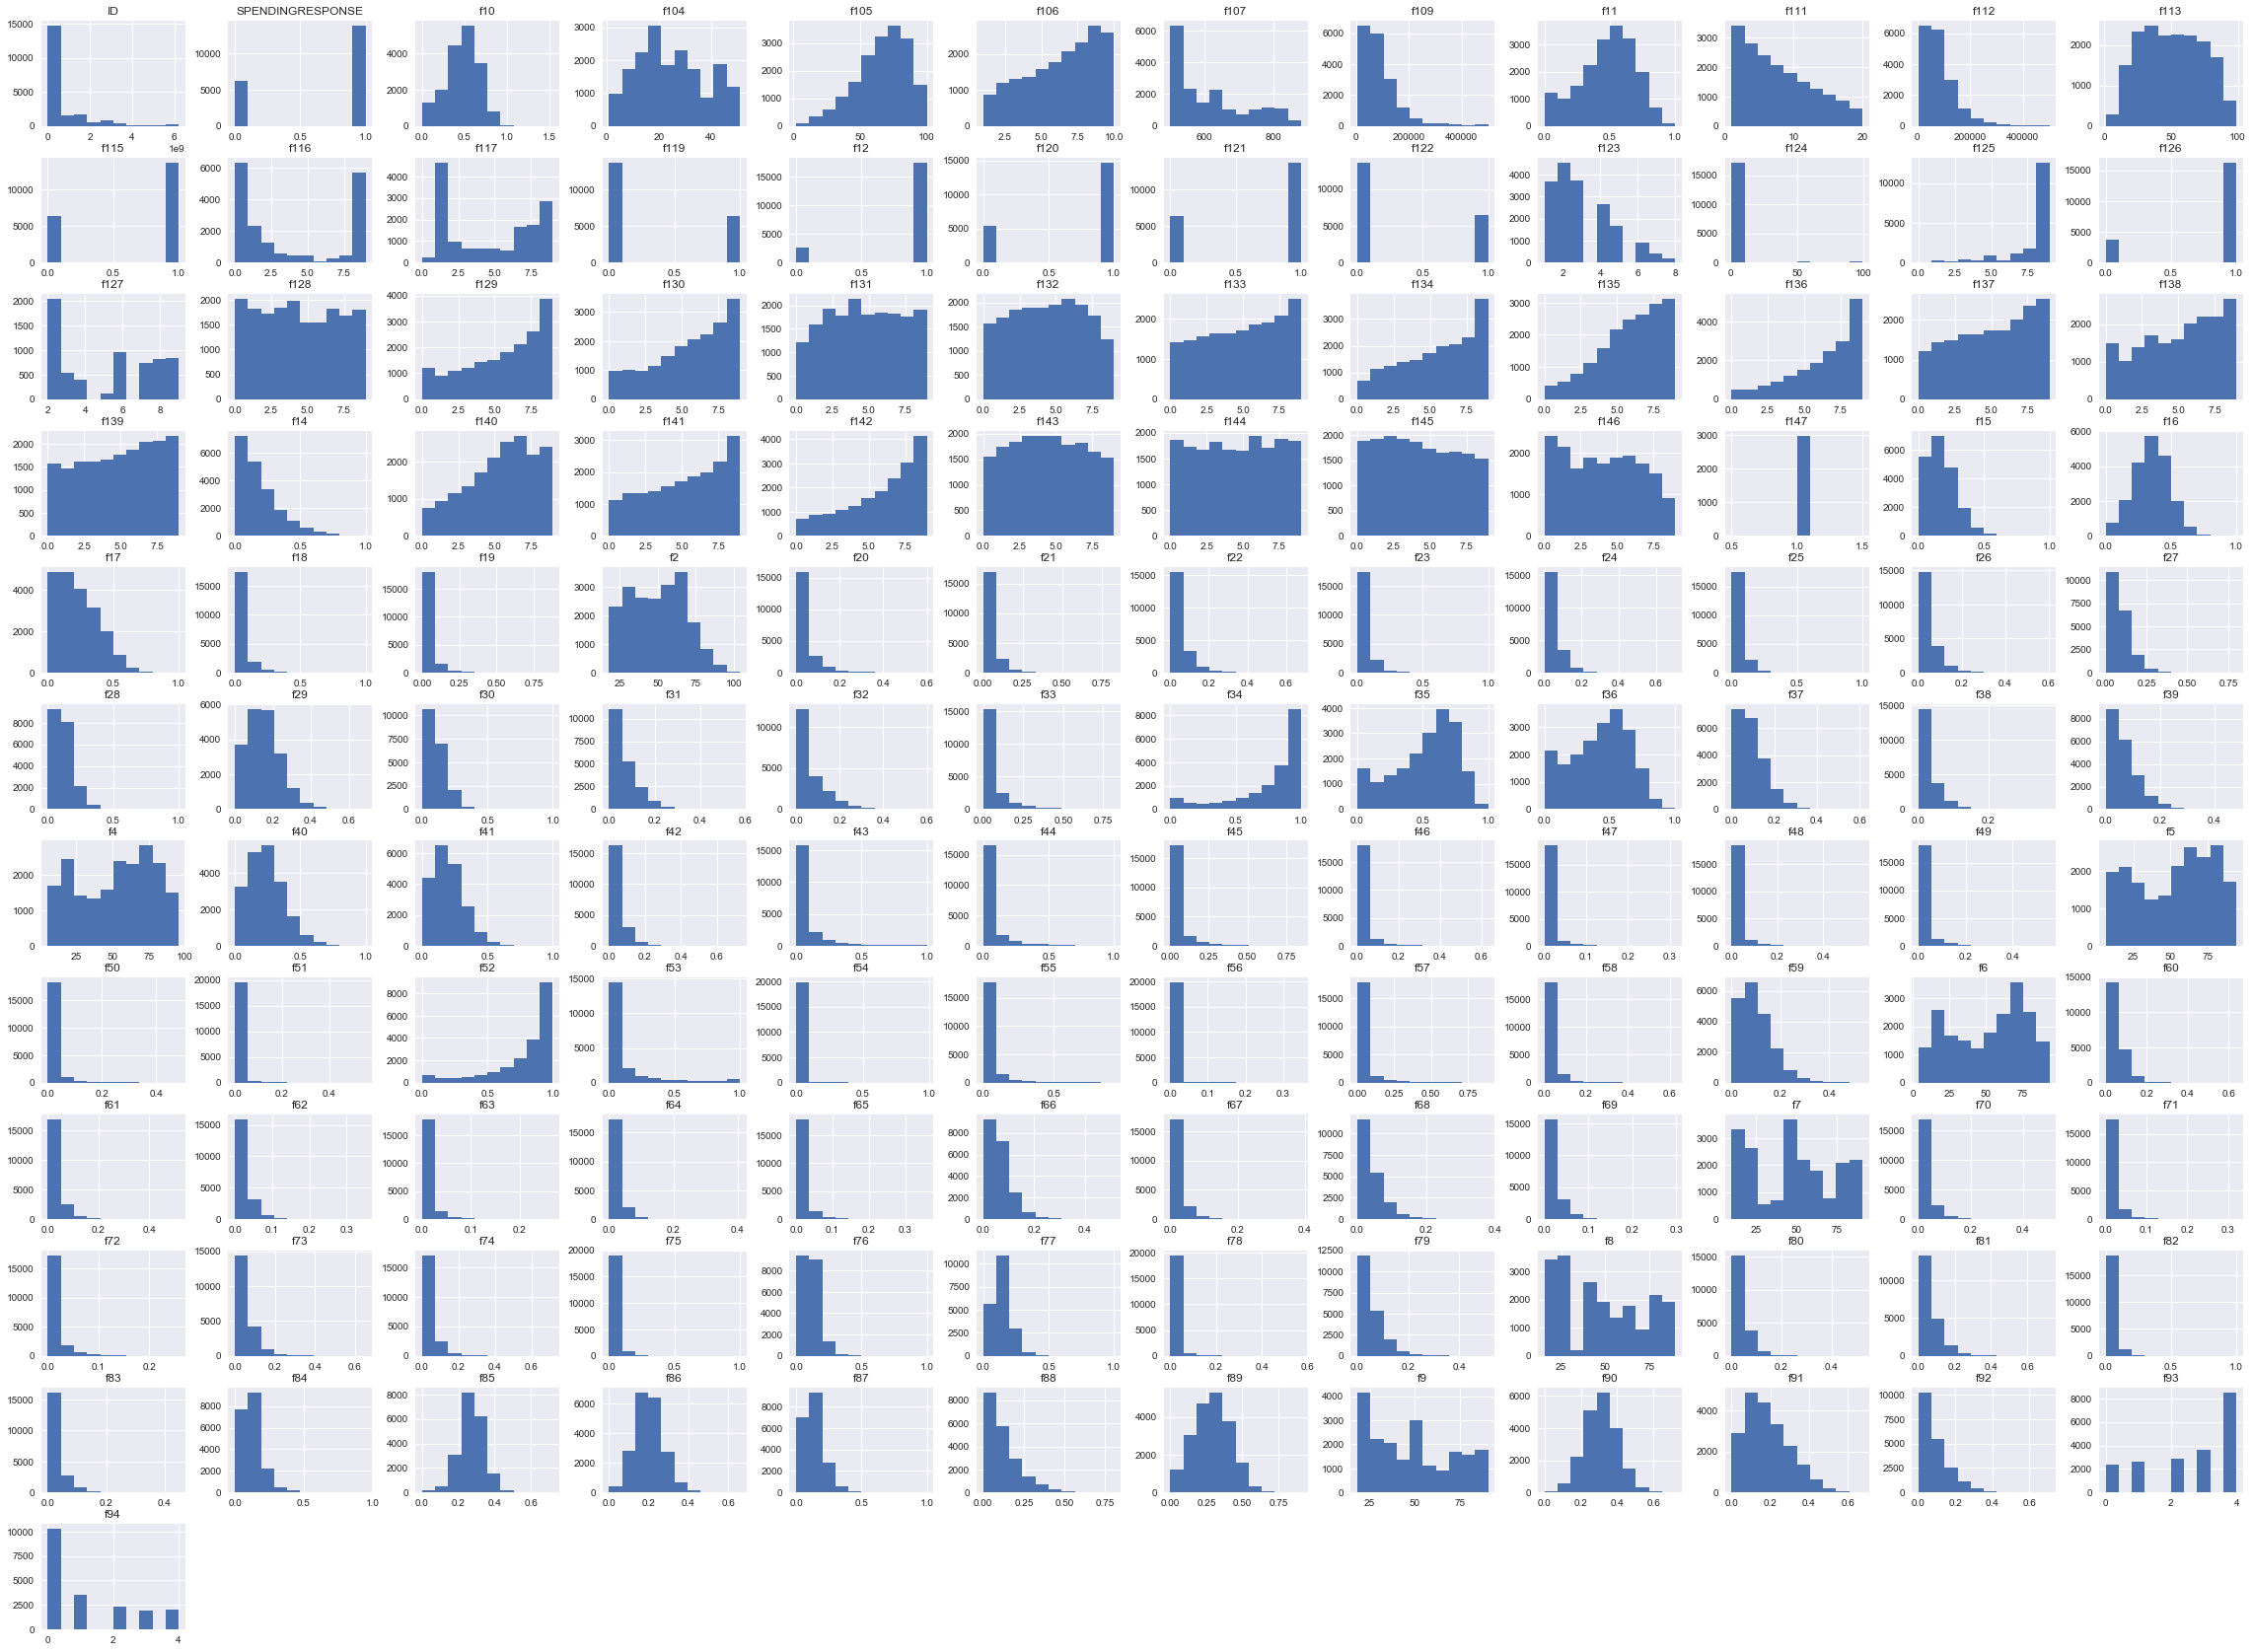

In [24]:
# We are visulasing the entire column in a bar graph to have better understanding of our data 

fig = plt.figure(figsize = (40,30))
ax = fig.gca()
data.hist(ax = ax)


In [25]:
numeric_l1000 = summary_numeric[summary_numeric.Null_Count < 1000 ]

In [26]:
numeric_l1000

,count,mean,std,min,25%,50%,75%,max,Null_Count
ID,20000,7.14522e+08,1.04773e+09,18138,1.37119e+08,3.38787e+08,7.42582e+08,6.19592e+09,0
f2,20000,49.9699,17.8222,18,35,51,63,104,0
f4,19925,52.4456,25.4684,5.16667,29.0833,56.5,73.6,95.8333,75
f5,19925,52.4124,25.3765,6.5,26.9167,57.25,74.25,94.1667,75
f6,19925,52.0825,25.1906,3.75,28.9167,57.9167,73.9167,94,75
f7,19925,48.5518,24.6497,10.0417,23.75,47.0417,67.75,90.875,75
f8,19925,48.3565,23.5761,15.5,25.5417,48.0833,69.9091,89.6667,75
f9,19925,48.4781,22.5402,18,28.4167,48.7083,69.75,90.7917,75
f14,19987,0.187094,0.160719,0,0.0661765,0.146313,0.266353,1,13
f15,19987,0.175615,0.112516,0,0.0916031,0.163004,0.242424,1,13


In [27]:
numeric_g1000 = summary_numeric[(summary_numeric.Null_Count > 1000 )& (summary_numeric.Null_Count < 10000)]

In [28]:
numeric_g1000

,count,mean,std,min,25%,50%,75%,max,Null_Count
f10,17537,0.475407,0.19421,0.001,0.361,0.49,0.614,1.543,2463
f11,18815,0.481241,0.210089,0,0.349,0.507,0.635,1,1185
f104,17795,24.2523,13.2053,1,14,22,33,51,2205
f105,17789,66.1627,19.2964,2,54,69,81,100,2211
f106,17795,6.46019,2.73378,1,4,7,9,10,2205
f107,17792,616.039,107.571,500,521,598,682,881,2208
f109,17795,88029.2,72581.5,5000,40000,71000,114000,500000,2205
f111,17795,7.75386,5.28852,1,3,7,12,20,2205
f112,17795,85832.2,67844.4,5000,40000,71000,111000,500000,2205
f113,17795,50.5667,22.713,1,32,50,69,99,2205


In [29]:
numeric_l = summary_numeric[summary_numeric.Null_Count > 10000 ]

In [30]:
numeric_l

,count,mean,std,min,25%,50%,75%,max,Null_Count
f127,6418,5.0952,2.6592,2,2,6,8,9,13582
f147,2983,1,0,1,1,1,1,1,17017


In [31]:
data.loc[data['f127'].notnull(), 'f127'] = 1
data['f127'].fillna(0, inplace=True)


data.loc[data['f147'].notnull(), 'f147'] = 1
data['f147'].fillna(0, inplace=True)



In [32]:
data = data.fillna(data.median())

In [33]:
## Get all the categorial variable 

cols = data.columns
num_cols = data._get_numeric_data().columns
categorical_columns= list(set(cols) - set(num_cols))


# Let's also check the column-wise distribution of null values:

categorical_nullcount= pd.DataFrame(data[categorical_columns].isnull().sum())
categorical_nullcount.columns = ['Null_Count']
summary_categorical = data.describe(include=['object', 'bool'])
summary_categorical = pd.DataFrame(summary_categorical.astype(object).T)
summary_categorical = summary_categorical[['count','unique']]


summary_categorical= pd.merge(summary_categorical, categorical_nullcount, left_index=True, right_index=True)

print("Total Number of categorical variable : ", len(categorical_columns))
print('\n\n\n Summary of the catergorical variable \n\n', summary_categorical)

Total Number of categorical variable :  17



 Summary of the catergorical variable 

        count unique  Null_Count
State  20000     51           0
f1     20000    437           0
f3     20000     17           0
f13    20000      2           0
f95    20000      6           0
f96    20000      4           0
f97    20000     10           0
f98    20000      4           0
f99    20000     10           0
f100   20000      4           0
f101   20000     10           0
f102   20000      4           0
f103   20000     10           0
f108   20000     16           0
f110   20000     31           0
f114   20000     21           0
f118   20000     11           0


In [34]:
numeric_nullcount= pd.DataFrame(data[num_cols].isnull().sum())
numeric_nullcount.columns = ['Null_Count']
summary_numeric = data.describe()
summary_numeric= summary_numeric.astype(object).T
summary_numeric= pd.merge(summary_numeric, numeric_nullcount, left_index=True, right_index=True)


print("Total Number of Numeric variable : ", len(num_cols))
# print('\n\n\n Summary of the Numeric variable \n\n', summary_numeric)

Total Number of Numeric variable :  133


In [35]:
summary_numeric

,count,mean,std,min,25%,50%,75%,max,Null_Count
ID,20000,7.14522e+08,1.04773e+09,18138,1.37119e+08,3.38787e+08,7.42582e+08,6.19592e+09,0
f2,20000,49.9699,17.8222,18,35,51,63,104,0
f4,20000,52.4608,25.4218,5.16667,29.4167,56.5,73.6,95.8333,0
f5,20000,52.4306,25.3306,6.5,27.25,57.25,74.25,94.1667,0
f6,20000,52.1044,25.1459,3.75,28.9167,57.9167,73.9167,94,0
f7,20000,48.5461,24.6037,10.0417,23.75,47.0417,67.75,90.875,0
f8,20000,48.3555,23.5318,15.5,25.5417,48.0833,69.9091,89.6667,0
f9,20000,48.4789,22.4979,18,28.4167,48.7083,69.75,90.7917,0
f10,20000,0.477204,0.181922,0.001,0.382,0.49,0.594,1.543,0
f11,20000,0.482767,0.20386,0,0.363,0.507,0.626,1,0


## Data Tranformation 

### Changing the catergorical variable in contineous 

In [36]:


encoder = ce.BinaryEncoder(cols=categorical_columns)
df_binary = encoder.fit_transform(data)

df_binary.head()

,f13_0,f13_1,f103_0,f103_1,f103_2,f103_3,f103_4,f95_0,f95_1,f95_2,...,f139,f140,f141,f142,f143,f144,f145,f146,f147,SPENDINGRESPONSE
0,0,1,0,0,0,0,1,0,0,0,...,4.0,4.0,6.0,9.0,6.0,3.0,0.0,3.0,0.0,0
1,0,1,0,0,0,0,1,0,0,0,...,7.0,8.0,8.0,4.0,6.0,8.0,4.0,4.0,0.0,0
2,1,0,0,0,0,0,1,0,0,0,...,8.0,7.0,6.0,8.0,8.0,9.0,3.0,6.0,0.0,1
3,1,0,0,0,0,0,1,0,0,0,...,9.0,5.0,9.0,4.0,7.0,7.0,4.0,4.0,0.0,1
4,0,1,0,0,0,0,1,0,0,0,...,1.0,7.0,8.0,9.0,3.0,4.0,3.0,1.0,0.0,1


# Checking Logistics Regression Assumption 

### Checking Correlation 

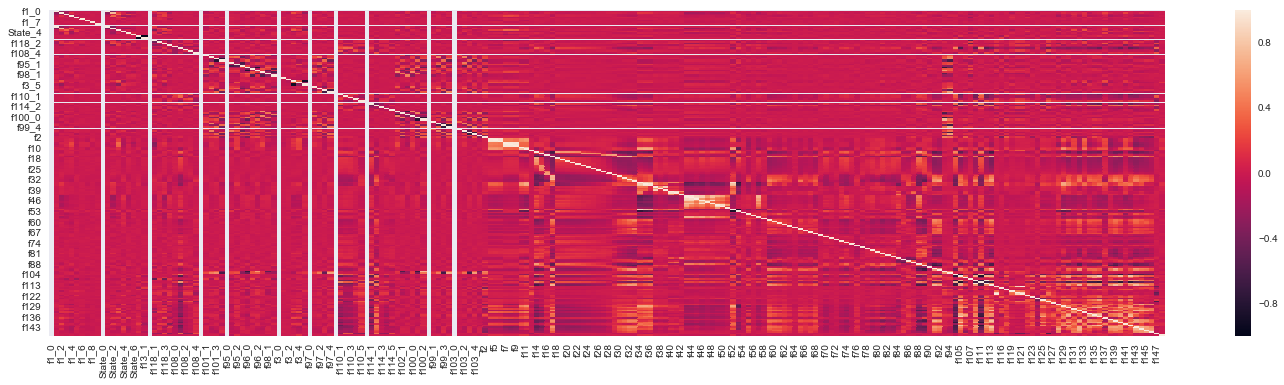

In [37]:
sns.heatmap(df_binary.corr())  


In [39]:
vif_cal(input_data=df_binary,dependent_col="SPENDINGRESPONSE"  )

C:\Users\babus\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


f1_0 vif = nan
f1_1 vif = 204.0
f1_2 vif = 40.96
f1_3 vif = 12.65
f1_4 vif = 3.99
f1_5 vif = 1.91
f1_6 vif = 1.34
f1_7 vif = 1.12
f1_8 vif = 1.06
f1_9 vif = 1.03
State_0 vif = nan
State_1 vif = 217.93
State_2 vif = 48.03
State_3 vif = 15.61
State_4 vif = 5.19
State_5 vif = 2.74
State_6 vif = 1.78


C:\Users\babus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


f13_0 vif = inf
f13_1 vif = 9007199254740992.0
f118_0 vif = nan
f118_1 vif = 7.65
f118_2 vif = 4.52
f118_3 vif = 2.97
f118_4 vif = 5.02
f108_0 vif = 1.87
f108_1 vif = 3.47
f108_2 vif = 1.46
f108_3 vif = 1.54
f108_4 vif = 1.45
f101_0 vif = nan
f101_1 vif = 2.11
f101_2 vif = 3.17
f101_3 vif = 6.02
f101_4 vif = 4.77
f95_0 vif = nan
f95_1 vif = 5.3
f95_2 vif = 4.87
f95_3 vif = 5.8
f96_0 vif = 15.63
f96_1 vif = 4.44
f96_2 vif = 12.21
f98_0 vif = 4.69
f98_1 vif = 5.14
f98_2 vif = 5.95
f3_0 vif = nan
f3_1 vif = 1.09
f3_2 vif = 1.17
f3_3 vif = 8.16
f3_4 vif = 1.49
f3_5 vif = 7.99
f97_0 vif = nan
f97_1 vif = 1.71
f97_2 vif = 2.28
f97_3 vif = 3.23
f97_4 vif = 3.57
f110_0 vif = nan
f110_1 vif = 1.89
f110_2 vif = 1.61
f110_3 vif = 1.52
f110_4 vif = 1.26
f110_5 vif = 1.37
f114_0 vif = nan
f114_1 vif = 2.33
f114_2 vif = 2.08
f114_3 vif = 1.53
f114_4 vif = 1.59
f114_5 vif = 1.18
f102_0 vif = 4.29
f102_1 vif = 4.83
f102_2 vif = 5.04
f100_0 vif = 4.1
f100_1 vif = 9.46
f100_2 vif = 12.89
f99_0 vif = nan

## Removing the value with high VIF 

In [37]:
df_binary = df_binary.drop(['f103_0','f110_0','f96_0','f95_0','f99_0','f97_0','f101_0','State_0','f3_0','f1_0','f118_0','f13_0','f114_0','f98_0'], axis=1)

In [38]:
df_binary = df_binary.drop(['f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36','f37','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56','f57','f58','f59','f60','f61','f62','f63','f64','f65','f66','f67','f68','f69','f70','f71','f72','f73','f74','f75','f76','f77','f78','f79','f80','f81','f82','f83'], axis=1)

In [39]:
df_binary = df_binary.drop(['f88','f89','f90','f91','f92','f94','f109','f112','f115','f121','f4','f100_2','f1_1','State_1','f103_3'], axis=1)

In [40]:
df_binary = df_binary.drop(['f93','f135','f113','f105','f93','f5','f6','f7','f8','f9','f118_1','f3_3','f102_0','f1_2','State_2','f95_1'], axis=1)

In [41]:
df_binary = df_binary.drop(['f143','f136','f111'], axis=1)

In [42]:
df_binary = df_binary.drop(['ID'], axis=1)

In [ ]:
vif_cal(input_data=df_binary,dependent_col="SPENDINGRESPONSE"  )

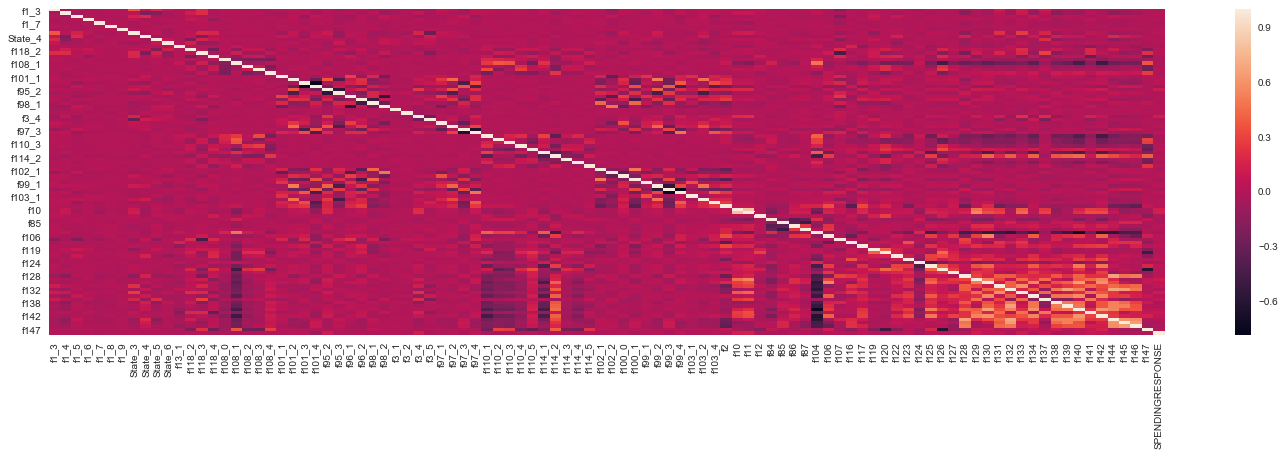

In [47]:
sns.heatmap(df_binary.corr())  


## Log Odds Plot

Text(0.5,1,'f10 Log Odds Linear Plot')

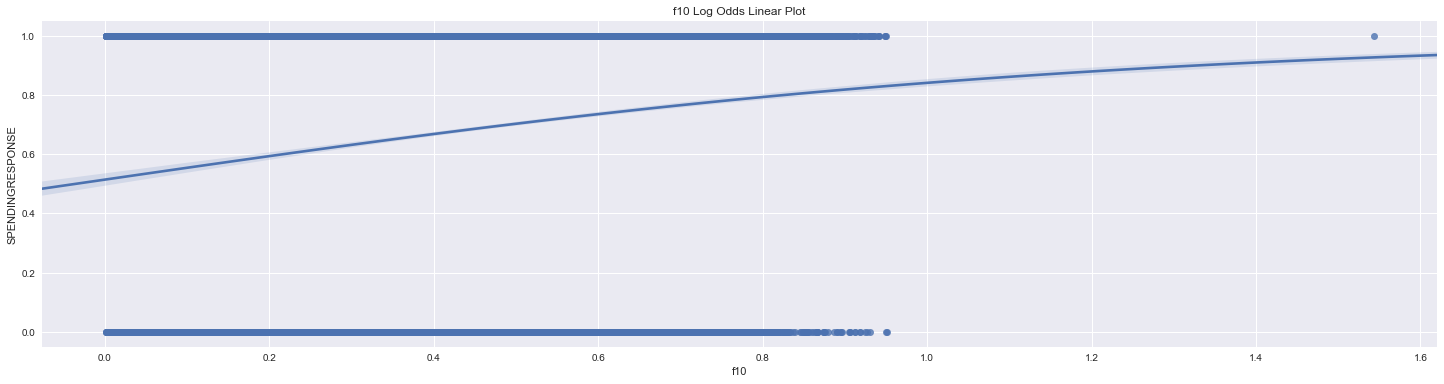

In [85]:
sns.regplot(x='f10', y= 'SPENDINGRESPONSE', data= data, logistic= True).set_title("f10 Log Odds Linear Plot")

Text(0.5,1,'f84 Log Odds Linear Plot')

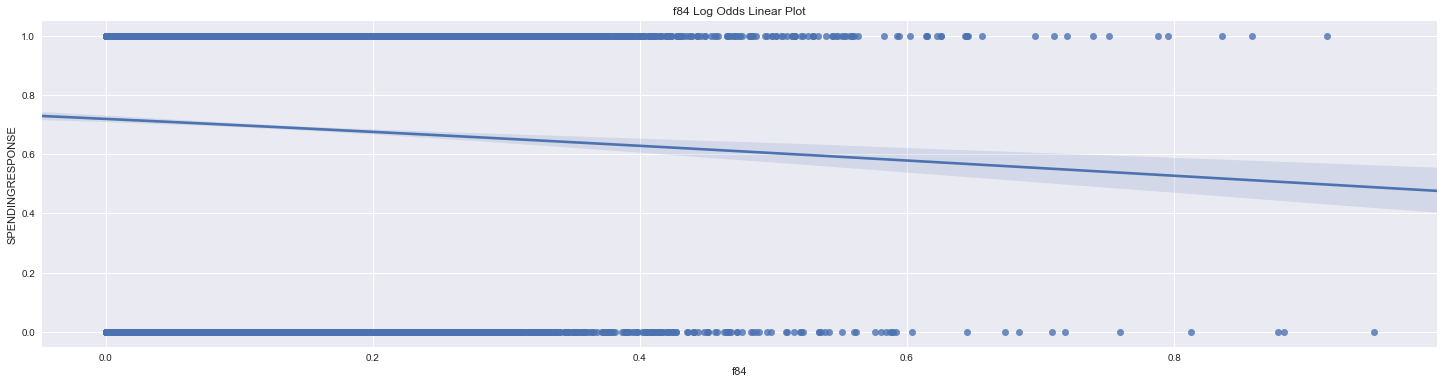

In [86]:
sns.regplot(x='f84', y= 'SPENDINGRESPONSE', data= data, logistic= True).set_title("f84 Log Odds Linear Plot")

## Normalizing the Data

In [44]:
x_temp = df_binary.loc[:, df_binary.columns != 'SPENDINGRESPONSE']
y = df_binary.loc[:, df_binary.columns == 'SPENDINGRESPONSE']

In [45]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [46]:
not_normalize= x_temp.filter(['f127','f147','f103_1','f103_2','f103_4','f110_1','f110_2','f110_3','f110_4','f110_5','f108_0','f108_1','f108_2','f108_3','f108_4','f96_1','f96_2','f95_2','f95_3','f99_1','f99_2','f99_3','f99_4','f97_1','f97_2','f97_3','f97_4','f101_1','f101_2','f101_3','f101_4','State_3','State_4','State_5','State_6','f3_1','f3_2','f3_4','f3_5','f102_1','f102_2','f1_3','f1_4','f1_5','f1_6','f1_7','f1_8','f1_9','f118_2','f118_3','f118_4','f100_0','f100_1','f13_1','f114_1','f114_2','f114_3','f114_4','f114_5','f98_1','f98_2'], axis=1)

to_normalize= x_temp.filter(['f2','f10','f11','f12','f84','f85','f86','f87','f104','f106','f107','f116','f117','f119','f120','f122','f123','f124','f125','f126','f128','f129','f130','f131','f132','f133','f134','f137','f138','f139','f140','f141','f142','f144','f145','f146'], axis=1)
np_scaled = min_max_scaler.fit_transform(to_normalize)
df_normalized = pd.DataFrame(np_scaled)
names = to_normalize.columns.values 
df_normalized.columns = names
df_normalized.head(5)

C:\Users\babus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,f2,f10,f11,f12,f84,f85,f86,f87,f104,f106,...,f134,f137,f138,f139,f140,f141,f142,f144,f145,f146
0,0.046512,-0.233463,0.006,1.0,-0.719542,-0.127144,-0.350943,-0.832285,0.68,1.000000,...,-0.111111,-0.111111,1.000000,-0.111111,-0.111111,0.333333,1.000000,-0.333333,-1.000000,-0.333333
1,-0.139535,-0.651102,-0.724,1.0,-0.656124,-0.029407,-0.138368,-0.797419,-0.40,0.777778,...,0.111111,0.111111,1.000000,0.555556,0.777778,0.777778,-0.111111,0.777778,-0.111111,-0.111111
2,-0.279070,-0.714656,-0.724,1.0,-0.842825,-0.330969,0.005958,-0.675753,-0.72,0.777778,...,-0.111111,-0.333333,1.000000,0.777778,0.555556,0.333333,0.777778,1.000000,-0.333333,0.333333
3,0.139535,-0.533074,-0.364,1.0,-0.692710,-0.167296,-0.145478,-0.891720,0.20,0.777778,...,-0.111111,-0.777778,0.555556,1.000000,0.111111,1.000000,-0.111111,0.555556,-0.111111,-0.111111
4,-0.069767,0.001297,0.376,1.0,-0.647378,-0.269090,-0.598746,-0.757996,-0.32,0.333333,...,-0.555556,0.333333,0.111111,-0.777778,0.555556,0.777778,1.000000,-0.111111,-0.333333,-0.777778


In [47]:
x = pd.concat([not_normalize, df_normalized], axis=1, sort=False)

## Spliting of Traning and Test Data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [49]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
results=logit_model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.592400
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.042     
Dependent Variable: SPENDINGRESPONSE AIC:              16781.1867
Date:               2018-10-29 01:57 BIC:              17513.2275
No. Observations:   14000            Log-Likelihood:   -8293.6   
Df Model:           96               LL-Null:          -8657.0   
Df Residuals:       13903            LLR p-value:      1.4723e-97
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
f127      -0.0422     0.0485   -0.8709   0.3838   -0.1372    0.0528
f147       0.1740     0.0918    1.8943   0.0582   -0.0060 

In [50]:
# y_pred4 = logit_model.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model.score(X_test, y_test)))

# Feature selection 

In [51]:
x2 = x[x.columns.difference(['f110_1','f110_2','f110_3','f110_5','f108_0','f108_1','f108_2','f108_3','f99_1','f99_4','f97_1','f97_2','f101_2','State_3','State_5','State_6','f1_4','f1_6','f1_8','f114_2','f114_3','f114_4','f114_5','f2','f12','f120','f124','f129','f130','f131','f138','f140'])]

In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y, test_size=0.3, random_state=1)


In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

C:\Users\babus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\babus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.69


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)

[[ 103 1739]
 [ 134 4024]]


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.43      0.06      0.10      1842
           1       0.70      0.97      0.81      4158

   micro avg       0.69      0.69      0.69      6000
   macro avg       0.57      0.51      0.46      6000
weighted avg       0.62      0.69      0.59      6000



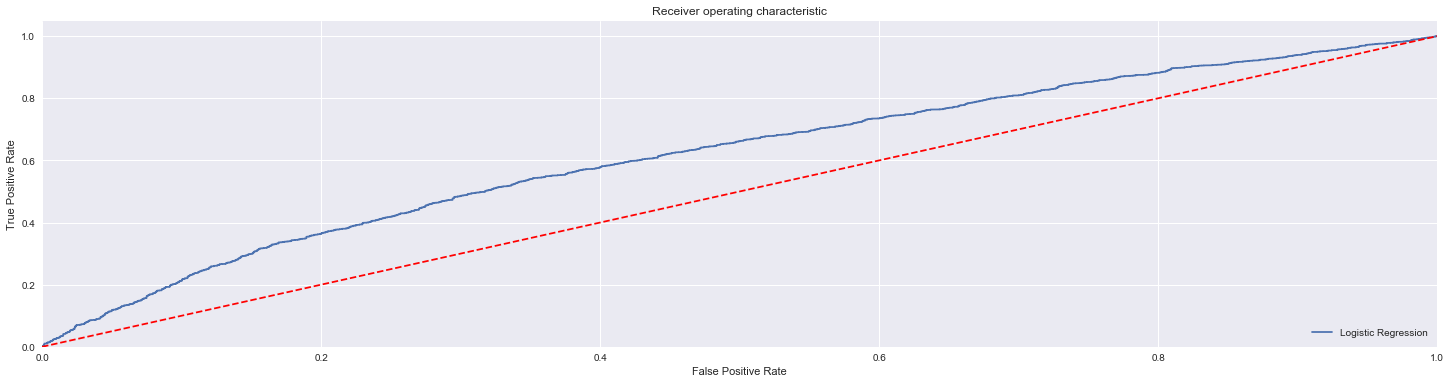

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test1, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### PCA  with Logistic regression 

In [58]:
import sklearn.linear_model as sklm ##Includes Logistic Regression, which will be tested for predictive capability
import sklearn.decomposition as skdc ##Includes Principal Component Analysis, a method of dimensionality reduction
import sklearn.pipeline as skpl ##Convenient module for calculating PCs and using them in logistic regression

In [59]:
pca = skdc.PCA() 

In [60]:
pcafit = pca.fit_transform(x,y)

In [61]:


var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))
###Since 29 components aren't necessary, the last 20 PCs will be disregarded 
###since they explain less than.01 of the variance
print(sum(var_explained[0:10]))
##indeed,the first 10 PCs explain 95% of the variance



0     0.115422
1     0.078424
2     0.061080
3     0.050587
4     0.036580
5     0.033564
6     0.029589
7     0.025733
8     0.024777
9     0.021580
10    0.018476
11    0.018056
12    0.016311
13    0.015754
14    0.015106
15    0.014521
16    0.013966
17    0.012758
18    0.012478
19    0.012140
20    0.011961
21    0.011722
22    0.011440
23    0.011240
24    0.010997
25    0.010821
26    0.010778
27    0.010676
28    0.010370
29    0.010188
30    0.009997
31    0.009663
32    0.008992
33    0.008495
34    0.008372
35    0.008091
36    0.007996
37    0.007592
38    0.007505
39    0.007315
40    0.007120
41    0.006666
42    0.006656
43    0.006339
44    0.006132
45    0.005956
46    0.005765
47    0.005622
48    0.005610
49    0.005454
50    0.005302
51    0.005195
52    0.004918
53    0.004894
54    0.004663
55    0.004608
56    0.004457
57    0.004393
58    0.004227
59    0.004140
60    0.004062
61    0.003943
62    0.003883
63    0.003535
64    0.003442
65    0.003394
66    0.00

In [62]:
pca = skdc.PCA(n_components = 10) #only include first 10 components
logregs = sklm.LogisticRegression()#empty model space
pipeline = skpl.Pipeline([('pca', pca), ('logistic', logregs)])

In [63]:
predMalignantRight = 0 #create count variables
predMalignantWrong = 0
predBenignRight = 0
predBenignWrong = 0

In [64]:
fit = pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test) 

C:\Users\babus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\babus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred2 = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

C:\Users\babus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


100.0